## **Business Understanding**

> **Context & Objective**

Dataset ini berisi fitur-fitur audio dari berbagai lagu beserta label genre-nya. Setiap lagu memiliki informasi numerik terkait karakteristik audio, seperti `Instrumentalness`, `Danceability`, `Energy`, `Loudness`, `Acousticness`, `Tempo`, dan beberapa fitur lainnya. Target variabelnya adalah genre lagu, misalnya Rock, Pop, HipHop, Metal, Blues, Country, Bollywood, Instrumental, dan lainnya.

**Tujuan** dari proyek ini adalah membangun model machine learning yang mampu memprediksi genre musik dari fitur audio secara otomatis. Dengan model ini, setiap lagu baru yang masuk dapat langsung dikategorikan ke genre yang tepat tanpa perlu pengelompokan manual.

> **Manfaat Bisnis**

* Rekomendasi Musik yang Lebih Akurat: Platform streaming musik dapat memberikan rekomendasi lagu yang sesuai preferensi pengguna berdasarkan genre yang relevan.
* Automatisasi Klasifikasi Lagu Baru: Mengurangi pekerjaan manual dalam menandai genre lagu baru, sehingga tim kurasi musik bisa fokus pada konten lain.
* Analisis Tren dan Preferensi Pengguna: Dengan mengetahui distribusi genre, platform dapat memahami tren musik dan preferensi pengguna untuk strategi pemasaran atau playlist yang lebih personal.
* Monetisasi Konten: Mempermudah segmentasi pasar untuk genre tertentu dan membantu kampanye promosi atau kolaborasi artis.

> **Informasi Dataset**

* Sumber: https://www.kaggle.com/datasets/purumalgi/music-genre-classification/data
* Jumlah Data:
  * Training set: 17.996 baris
  * Jumlah Fitur: 17 kolom, meliputi:
  * `Artist_Name`, `Track_Name`, `Popularity`, `Danceability`, `Energy`, `Key`, `Loudness`, `Mode`, `Speechiness`, `Acousticness`, `Instrumentalness`, `Liveness`, `Valence`, `Tempo`, `Duration_in min/ms`, `Time_Signature`.
  * Target Variable: `Class` (genre lagu)



In [67]:
## Dataset

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
## Import Library dan Load Data

# Import library dasar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import log_loss, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Tampilkan semua kolom
pd.set_option('display.max_columns', None)

# Load data
train = pd.read_excel('/content/drive/MyDrive/Data Projek/Train.xlsx')

print("Ukuran data train:", train.shape)
train.head()


Ukuran data train: (17996, 17)


,Artist Name,Track Name,Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_in min/ms,Time_Signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


## **Data Understanding**

In [69]:
## Data Understanding

# Informasi struktur data
train.info()

# Jumlah nilai unik di setiap kolom
train.nunique()

# Statistik deskriptif numerik
display(train.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   Danceability        17996 non-null  float64
 4   Energy              17996 non-null  float64
 5   Key                 15982 non-null  float64
 6   Loudness            17996 non-null  float64
 7   Mode                17996 non-null  int64  
 8   Speechiness         17996 non-null  float64
 9   Acousticness        17996 non-null  float64
 10  Instrumentalness    13619 non-null  float64
 11  Liveness            17996 non-null  float64
 12  Valence             17996 non-null  float64
 13  Tempo               17996 non-null  float64
 14  Duration_in min/ms  17996 non-null  float64
 15  Time_Signature      17996 non-null  int64  
 16  Clas

,Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_in min/ms,Time_Signature,Class
count,17568.000000,17996.000000,17996.000000,15982.000000,17996.000000,17996.000000,17996.000000,17996.000000,13619.000000,17996.000000,17996.000000,17996.000000,1.799600e+04,17996.000000,17996.000000
mean,44.512124,0.543433,0.662777,5.952447,-7.910660,0.636753,0.079707,0.247082,0.177562,0.196170,0.486208,122.623294,2.007445e+05,3.924039,6.695821
std,17.426928,0.166268,0.235373,3.196854,4.049151,0.480949,0.083576,0.310632,0.304048,0.159212,0.240195,29.571527,1.119891e+05,0.361618,3.206073
min,1.000000,0.059600,0.000020,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,5.016500e-01,1.000000,0.000000
25%,33.000000,0.432000,0.509000,3.000000,-9.538000,0.000000,0.034800,0.004300,0.000089,0.097500,0.297000,99.620750,1.663370e+05,4.000000,5.000000
50%,44.000000,0.545000,0.700000,6.000000,-7.016000,1.000000,0.047400,0.081400,0.003910,0.129000,0.481000,120.065500,2.091600e+05,4.000000,8.000000
75%,56.000000,0.659000,0.860000,9.000000,-5.189000,1.000000,0.083000,0.434000,0.200000,0.258000,0.672000,141.969250,2.524900e+05,4.000000,10.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


## **Data Preparation**


### **Memeriksa Missing Value**

In [70]:
## Cek dan Analisis Missing  Value (Hapus baris yang berisi data null)

missing = train.isnull().sum().sort_values(ascending=False)
percent = (missing / len(train)) * 100
missing_df = pd.DataFrame({'Missing Values': missing, 'Percent (%)': percent})
missing_df[missing_df['Missing Values'] > 0]


,Missing Values,Percent (%)
Instrumentalness,4377,24.322072
Key,2014,11.191376
Popularity,428,2.378306


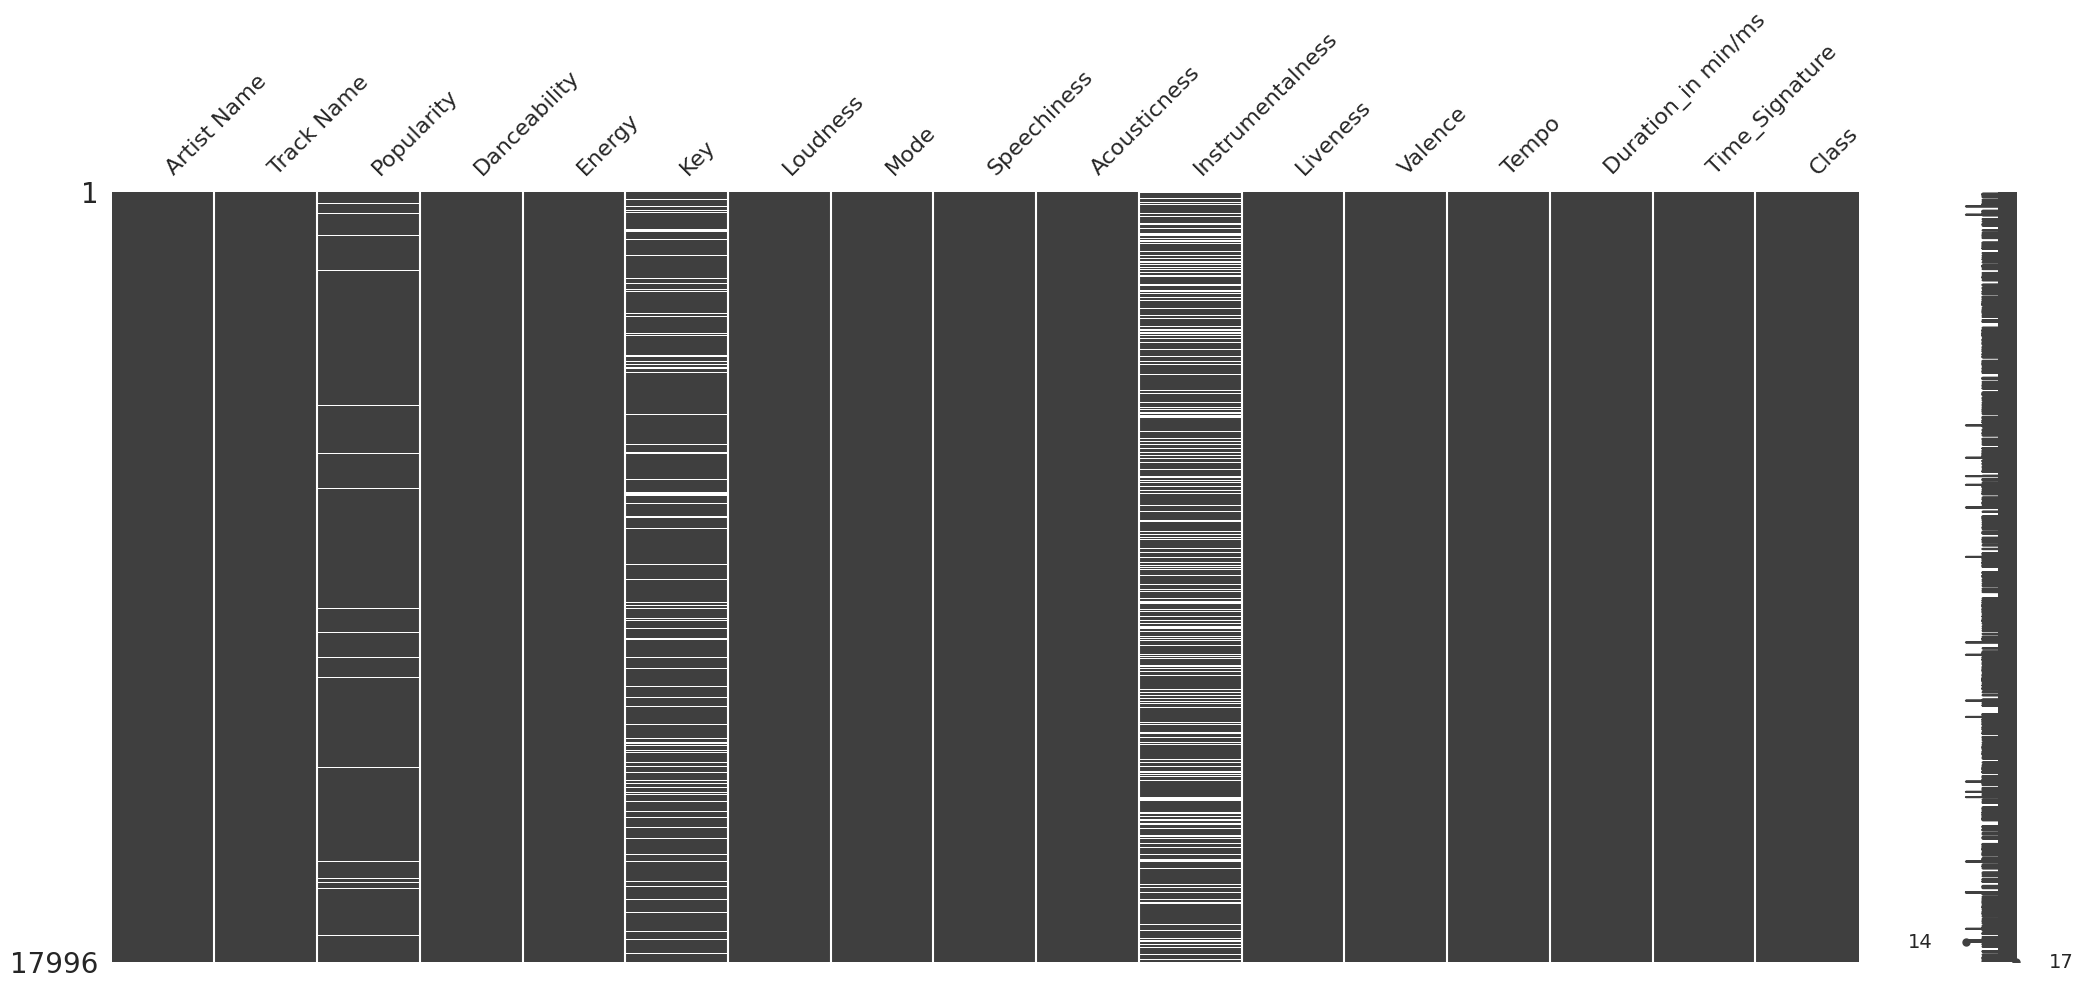

In [71]:
## Visualisasi Missing Value

!pip install missingno
import missingno as msno

msno.matrix(train)
plt.show()


###  Menangani Missing Values
Berdasarkan hasil analisis, terdapat tiga fitur dengan data hilang, yaitu:

1. `Instrumentalness` (24.3%)
2. `Key` (11.2%)
3. `Popularity` (2.4%).  

> **Alasan Perlakuan:**
* `Instrumentalness` dan `Key`: Kedua fitur memiliki proporsi data hilang yang lebih dari 5%, sehingga tidak memenuhi kriteria untuk imputasi di proyek ini. Untuk menjaga integritas data dan menghindari distorsi distribusi, baris yang mengandung nilai hilang pada fitur-fitur ini dihapus.
* `Popularity`: Karena nilai hilang hanya sebesar 2.4% (<5%), imputasi masih dapat dilakukan tanpa menimbulkan bias signifikan. Nilai median dipilih agar lebih robust terhadap pencilan (outlier).


In [72]:
## Menangani Missing Value

# Menghapus baris dengan missing value pada 'Instrumentalness' dan 'Key'
train = train.dropna(subset=['Instrumentalness', 'Key'])

# Mengimputasi missing value pada 'Popularity' dengan median
train['Popularity'].fillna(train['Popularity'].median(), inplace=True)


/tmp/ipython-input-3196428970.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Popularity'].fillna(train['Popularity'].median(), inplace=True)


In [73]:
## Cek Ulang Data setelah Penanganan Missing Value

# Mengecek jumlah baris setelah penanganan missing values
print("Jumlah baris setelah penanganan:", train.shape[0])

# Mengecek jumlah missing values per kolom
print("\nJumlah missing values per kolom setelah penanganan:")
print(train.isnull().sum())

Jumlah baris setelah penanganan: 12088

Jumlah missing values per kolom setelah penanganan:
Artist Name           0
Track Name            0
Popularity            0
Danceability          0
Energy                0
Key                   0
Loudness              0
Mode                  0
Speechiness           0
Acousticness          0
Instrumentalness      0
Liveness              0
Valence               0
Tempo                 0
Duration_in min/ms    0
Time_Signature        0
Class                 0
dtype: int64


###**Memeriksa Outlier**

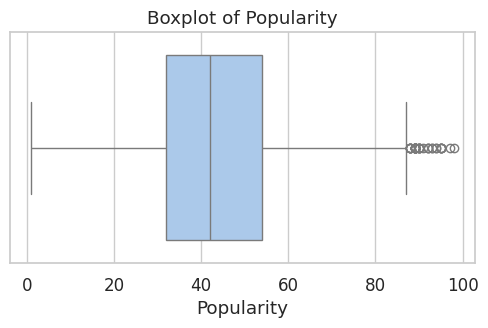

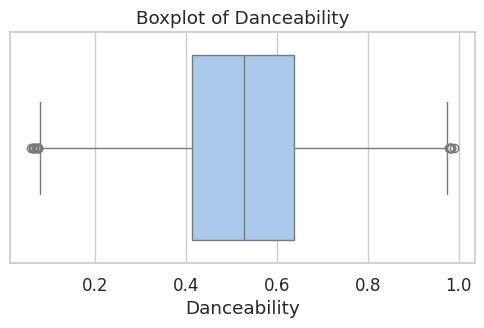

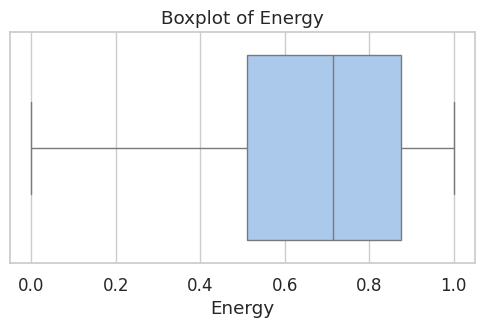

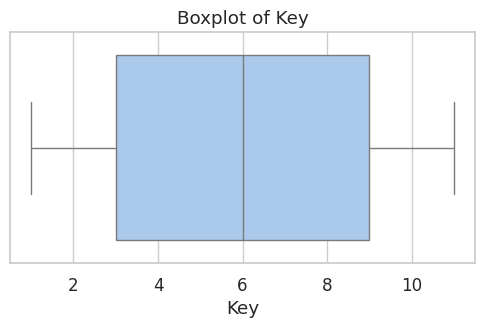

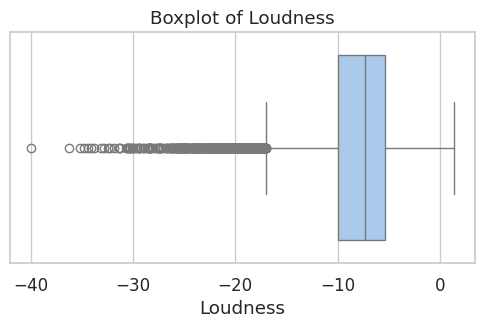

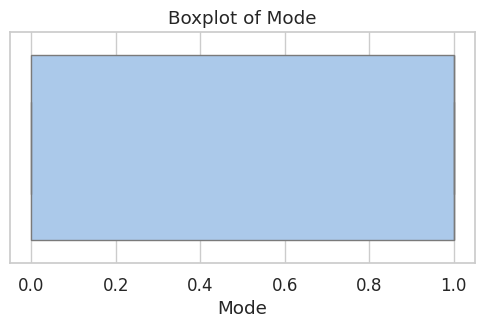

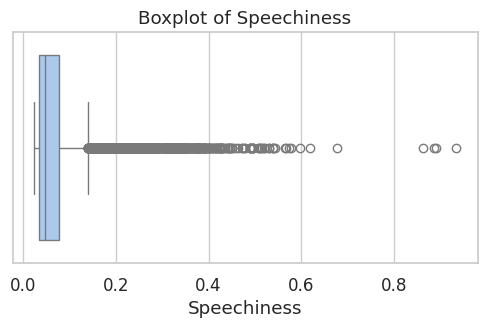

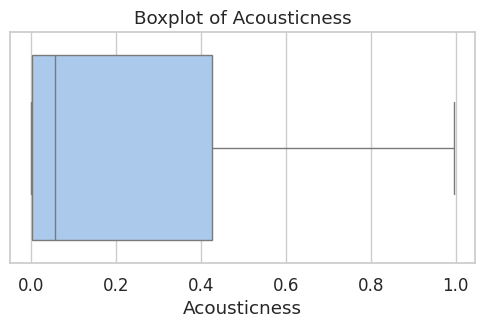

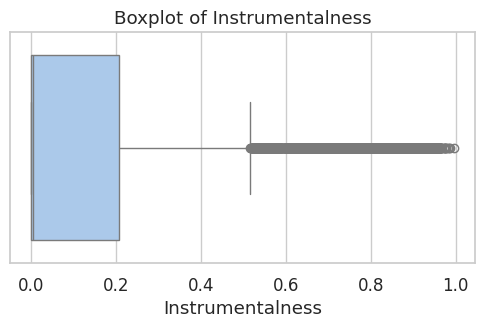

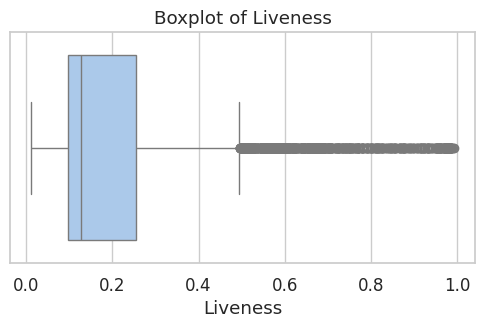

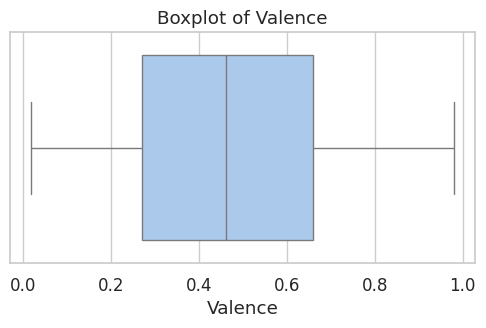

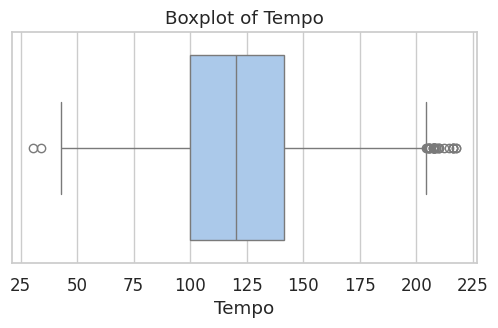

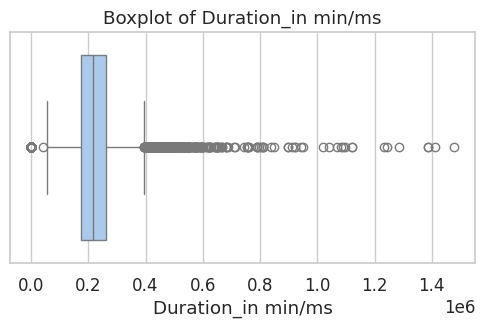

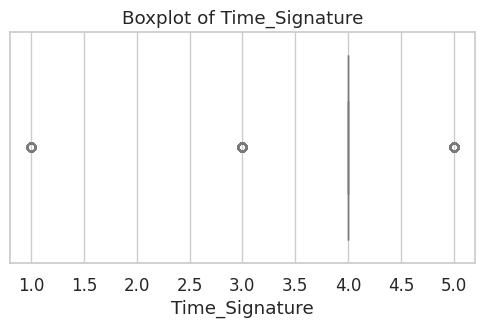

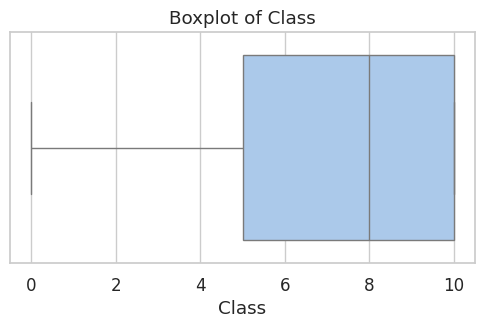


=== OUTLIER SUMMARY (FINAL) ===
                    Outlier_Count  Outlier_Pct(%)
Instrumentalness             2115           17.50
Duration_in min/ms           2113           17.48
Speechiness                  1226           10.14
Time_Signature               1125            9.31
Liveness                      640            5.29
Loudness                      552            4.57
Popularity                     38            0.31
Tempo                          31            0.26
Danceability                   17            0.14
Energy                          0            0.00
Key                             0            0.00
Mode                            0            0.00
Acousticness                    0            0.00
Valence                         0            0.00
Class                           0            0.00


In [74]:
## Cek Outlier

# Ambil hanya kolom numerik
num_cols = train.select_dtypes(include=['float64', 'int64']).columns

# Cek distribusi dengan boxplot
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=train[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Deteksi outlier pakai IQR (tanpa menghapus dulu)
def outlier_summary(df, num_cols):
  Q1 = train[num_cols].quantile(0.25)
  Q3 = train[num_cols].quantile(0.75)
  IQR = Q3 - Q1
  outliers_count = ((train[num_cols] < (Q1 - 1.5 * IQR)) | (train[num_cols] > (Q3 + 1.5 * IQR))).sum()
  total_rows = len(df)

# Hitung jumlah outlier
  outlier_count = ((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).sum()
  total_rows = len(df)

# Ubah jadi persentase
  outlier_percent = (outlier_count / total_rows) * 100

# Gabung hasilnya jadi DataFrame
  summary_df = pd.DataFrame({
      'Outlier_Count': outlier_count,
      'Outlier_Pct(%)': outlier_percent.round(2)
  }).sort_values('Outlier_Pct(%)', ascending=False)

  return summary_df

# Panggil fungsinya
print("\n=== OUTLIER SUMMARY (FINAL) ===")
print(outlier_summary(train, num_cols))

# Winsorization / Clipping untuk mengatasi nilai terlalu ekstrem
for col in num_cols:
    lower = train[col].quantile(0.01)
    upper = train[col].quantile(0.99)
    train[col] = np.clip(train[col], lower, upper)


### **Penanganan Outlier**

1. `Instrumentalness` 17.5% : Biarkan, karena ini merupakan variasi alami, bukan error data.
2. `Duration_in min/ms` 17.48% : Lakukan clipping (1%–99%). Lagu dengan durasi sangat pendek/panjang (misal interlude atau live version) wajar muncul. Nilainya ekstrem tapi masih relevan untuk genre tertentu (misal rap, live, instrumental). Clipping menjaga agar tidak mendistorsi model.
3. `Speechiness` 10.14% : Lakukan clipping (1%–99%). Genre rap dan spoken word wajar mempunyai nilai speechiness tinggi karena mencerminkan genre.
4. `Time_Signature` 9.31% : Periksa nilai aneh (0 atau >7) dan hapus kalau ada.
5. `Liveness` 5.29% : Liveness cukup tinggi bisa berarti live recordingnya valid. Lakukan winsorize ringan.
6. `Loudness`, `Popularity`, `Tempo`, `Danceability`, `Energy`, `Key`, `Mode`, `Acousticness`, `Valence`: Outlier di fitur ini umumnya wajar dan informatif secara musikal.


In [75]:
## Penanganan Outlier

# Fungsi ringkasan outlier dengan IQR
def outlier_summary(df, num_cols):
    Q1 = df[num_cols].quantile(0.25)
    Q3 = df[num_cols].quantile(0.75)
    IQR = Q3 - Q1
    outliers_count = ((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).sum()
    outliers_pct = (outliers_count / len(df) * 100).round(2)
    summary_df = pd.DataFrame({'Outlier_Count': outliers_count, 'Outlier_Pct(%)': outliers_pct})
    return summary_df.sort_values('Outlier_Pct(%)', ascending=False)

# Clipping 1%–99% untuk fitur ekstrem
cols_to_clip = ['Duration_in min/ms', 'Speechiness']
for col in cols_to_clip:
    if col in train.columns:
        lower = train[col].quantile(0.01)
        upper = train[col].quantile(0.99)
        train[col] = np.clip(train[col], lower, upper)
        print(f"Clipped {col} to [{lower:.4f}, {upper:.4f}]")

# Winsorization untuk Liveness
cols_wins = ['Liveness']
for col in cols_wins:
    if col in train.columns:
        lower = train[col].quantile(0.01)
        upper = train[col].quantile(0.99)
        train[col] = np.clip(train[col], lower, upper)
        print(f"Winsorized {col} to [{lower:.6f}, {upper:.6f}]")

# Filter Time_Signature yang tidak logis
print("\nUnique Time_Signature values (raw):", sorted(train['Time_Signature'].unique()))
before_len = len(train)
train = train[train['Time_Signature'].between(3, 7)]
after_len = len(train)
print(f"Filtered Time_Signature: removed {before_len - after_len} rows")
print("\nTime_Signature value counts (sesudah):")
print(train['Time_Signature'].value_counts().sort_index())


Clipped Duration_in min/ms to [2.4708, 532268.4365]
Clipped Speechiness to [0.0253, 0.3670]
Winsorized Liveness to [0.040498, 0.855017]

Unique Time_Signature values (raw): [np.int64(3), np.int64(4), np.int64(5)]
Filtered Time_Signature: removed 0 rows

Time_Signature value counts (sesudah):
Time_Signature
3      995
4    10963
5      130
Name: count, dtype: int64


### **Feature Engineering**


Transformasi log pada fitur numerik seperti durasi lagu dan speechiness dilakukan untuk memperbaiki distribusi data yang awalnya sangat skewed (condong ke satu sisi dengan banyak outlier). Sebelum transformasi, sebagian besar durasi lagu dan nilai speechiness berada pada nilai rendah, dengan sedikit data yang sangat tinggi sehingga membentuk long tail ke kanan. Hal ini menyebabkan distribusi data kurang ideal untuk banyak algoritma machine learning yang bekerja optimal dengan data yang lebih simetris atau mendekati normal. Dilakukan Transformasi log untuk menyeimbangkan kedua fitur sembari mengurangi pengaruh outlier pada masing fitur.




=== OUTLIER SUMMARY (SESUDAH TRANSFORMASI) ===
                  Outlier_Count  Outlier_Pct(%)
Instrumentalness           2115           17.50
Duration_log               1837           15.20
Speechiness_log            1178            9.75
Time_Signature             1125            9.31
Liveness                    640            5.29
Loudness                    552            4.57
Acousticness                  0            0.00
Popularity                    0            0.00
Energy                        0            0.00
Valence                       0            0.00
Danceability                  0            0.00
Class                         0            0.00
Key                           0            0.00
Mode                          0            0.00
Tempo                         0            0.00

Jumlah baris setelah pembersihan: 12088


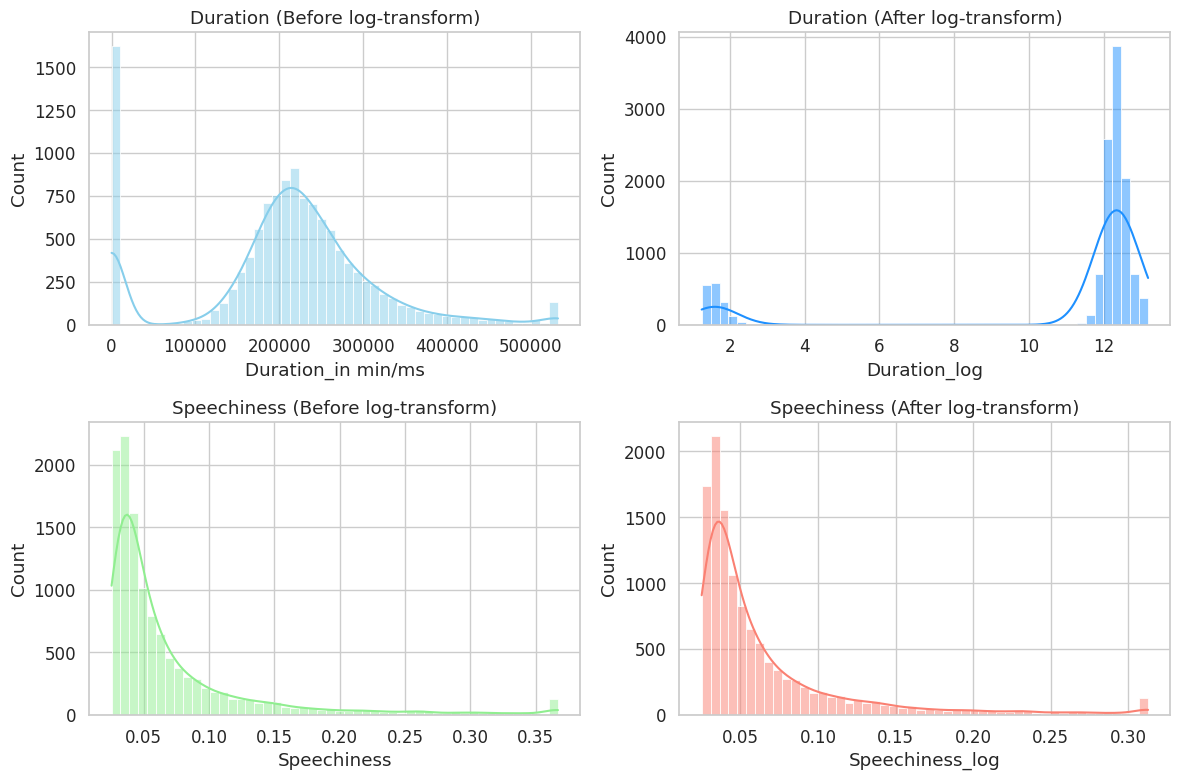

In [76]:
## Transformasi log untuk fitur skewed
train['Duration_log'] = np.log1p(train['Duration_in min/ms'])
train['Speechiness_log'] = np.log1p(train['Speechiness'])

# Perbarui daftar kolom numerik untuk model
num_cols = train.select_dtypes(include='number').columns.tolist()
num_cols = [c for c in num_cols if c not in ['Duration_in min/ms', 'Speechiness']]
num_cols += ['Duration_log', 'Speechiness_log']
num_cols = list(set(num_cols))

# Ringkasan outlier setelah transformasi
print("\n=== OUTLIER SUMMARY (SESUDAH TRANSFORMASI) ===")
summary_after = outlier_summary(train, num_cols)
print(summary_after)
print("\nJumlah baris setelah pembersihan:", len(train))

# Cek distribusi sebelum dan sesudah log-transform
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

# Duration_in min/ms
sns.histplot(train['Duration_in min/ms'], bins=50, ax=ax[0, 0], kde=True, color='skyblue')
ax[0, 0].set_title('Duration (Before log-transform)')
sns.histplot(train['Duration_log'], bins=50, ax=ax[0, 1], kde=True, color='dodgerblue')
ax[0, 1].set_title('Duration (After log-transform)')

# Speechiness
sns.histplot(train['Speechiness'], bins=50, ax=ax[1, 0], kde=True, color='lightgreen')
ax[1, 0].set_title('Speechiness (Before log-transform)')
sns.histplot(train['Speechiness_log'], bins=50, ax=ax[1, 1], kde=True, color='salmon')
ax[1, 1].set_title('Speechiness (After log-transform)')

plt.tight_layout()
plt.show()


## **Exploratory Data Analysis (EDA)**



In [77]:
##  Exploratory Data Analysis (EDA)

# Import dan Setup Awal
# Setting gaya visualisasi
sns.set(style="whitegrid", palette="pastel", font_scale=1.1)

# Cek ukuran data & tipe kolom
print("Ukuran dataset:", train.shape)
print("\nTipe data tiap kolom:")
print(train.dtypes)

# Cek 5 baris pertama
train.head()


Ukuran dataset: (12088, 19)

Tipe data tiap kolom:
Artist Name            object
Track Name             object
Popularity            float64
Danceability          float64
Energy                float64
Key                   float64
Loudness              float64
Mode                    int64
Speechiness           float64
Acousticness          float64
Instrumentalness      float64
Liveness              float64
Valence               float64
Tempo                 float64
Duration_in min/ms    float64
Time_Signature          int64
Class                   int64
Duration_log          float64
Speechiness_log       float64
dtype: object


,Artist Name,Track Name,Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_in min/ms,Time_Signature,Class,Duration_log,Speechiness_log
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.23000,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.45400,251733.0,4,10,12.436128,0.039797
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.33400,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.68100,109667.0,4,6,11.605213,0.051168
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.27900,1,0.2160,0.000169,0.016100,0.1720,0.0918,194.76712,229960.0,4,10,12.345665,0.195567
5,The Stooges,Search and Destroy - Iggy Pop Mix,53.0,0.235,0.977,6.0,-2.24583,1,0.1070,0.003530,0.006040,0.1720,0.2410,152.95200,208133.0,4,6,12.245937,0.101654
6,Solomon Burke,None Of Us Are Free,48.0,0.674,0.658,5.0,-9.64700,0,0.1040,0.404000,0.000001,0.0981,0.6770,143.29200,329387.0,4,2,12.704992,0.098940


### Interpretasi

Genre dengan jumlah lagu terbanyak menunjukkan representasi yang dominan dalam data, yang bisa memengaruhi keseimbangan kelas saat training model.

In [80]:
## Penentuan Genre

le = LabelEncoder()
y_encoded = le.fit_transform(train['Class'])

# Cek urutan hasil encoding
print(list(le.classes_))


[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10)]


/tmp/ipython-input-1554687679.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Genre_Label', data=train, order=train['Genre_Label'].value_counts().index, palette='viridis')


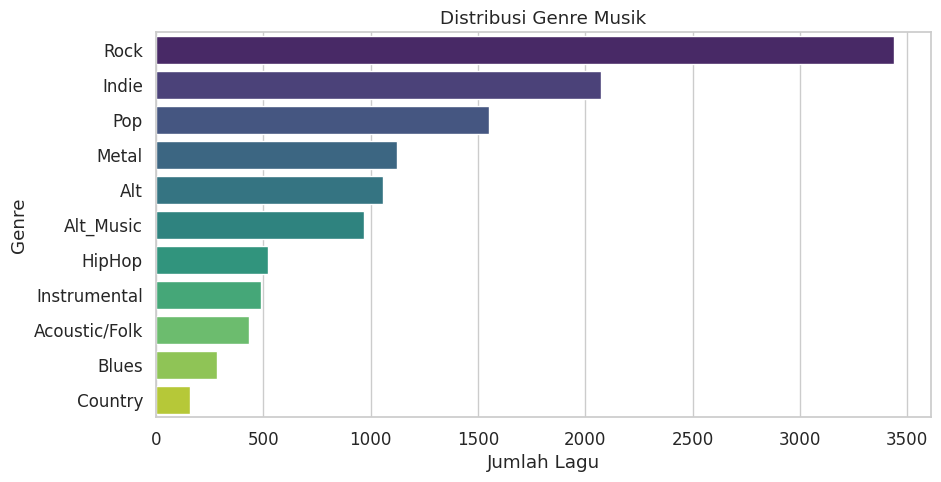

Mapping Kode Genre: {0: 'Acoustic/Folk', 1: 'Alt', 2: 'Alt_Music', 3: 'Blues', 4: 'Country', 5: 'HipHop', 6: 'Indie', 7: 'Instrumental', 8: 'Pop', 9: 'Metal', 10: 'Rock'}

Jumlah lagu per genre:
Genre_Label
Rock             3439
Indie            2072
Pop              1549
Metal            1120
Alt              1059
Alt_Music         967
HipHop            522
Instrumental      488
Acoustic/Folk     431
Blues             283
Country           158
Name: count, dtype: int64


In [81]:
## Distribusi Target

# Mapping kode genre ke nama genre
genre_mapping = {
    0: 'Acoustic/Folk',
    1: 'Alt',
    2: 'Alt_Music',
    3: 'Blues',
    4: 'Country',
    5: 'HipHop',
    6: 'Indie',
    7: 'Instrumental',
    8: 'Pop',
    9: 'Metal',
    10: 'Rock'
}

# Tambahkan kolom baru untuk label genre agar visualisasi lebih informatif
train['Genre_Label'] = train['Class'].map(genre_mapping)

# Plot distribusi
plt.figure(figsize=(10,5))
sns.countplot(y='Genre_Label', data=train, order=train['Genre_Label'].value_counts().index, palette='viridis')
plt.title('Distribusi Genre Musik')
plt.xlabel('Jumlah Lagu')
plt.ylabel('Genre')
plt.show()

# Tampilkan mapping dan jumlah lagu per genre
print("Mapping Kode Genre:", genre_mapping)
print("\nJumlah lagu per genre:")
print(train['Genre_Label'].value_counts())


### Interpretasi
Distribusi variabel per class menunjukkan adanya keragaman karakteristik antar genre, setiap fitur memiliki pola yang berbeda pada setiap kelas. Hal ini menandakan bahwa setiap genre memiliki ciri khas musik tersendiri yang dapat membantu model dalam proses klasifikasi.

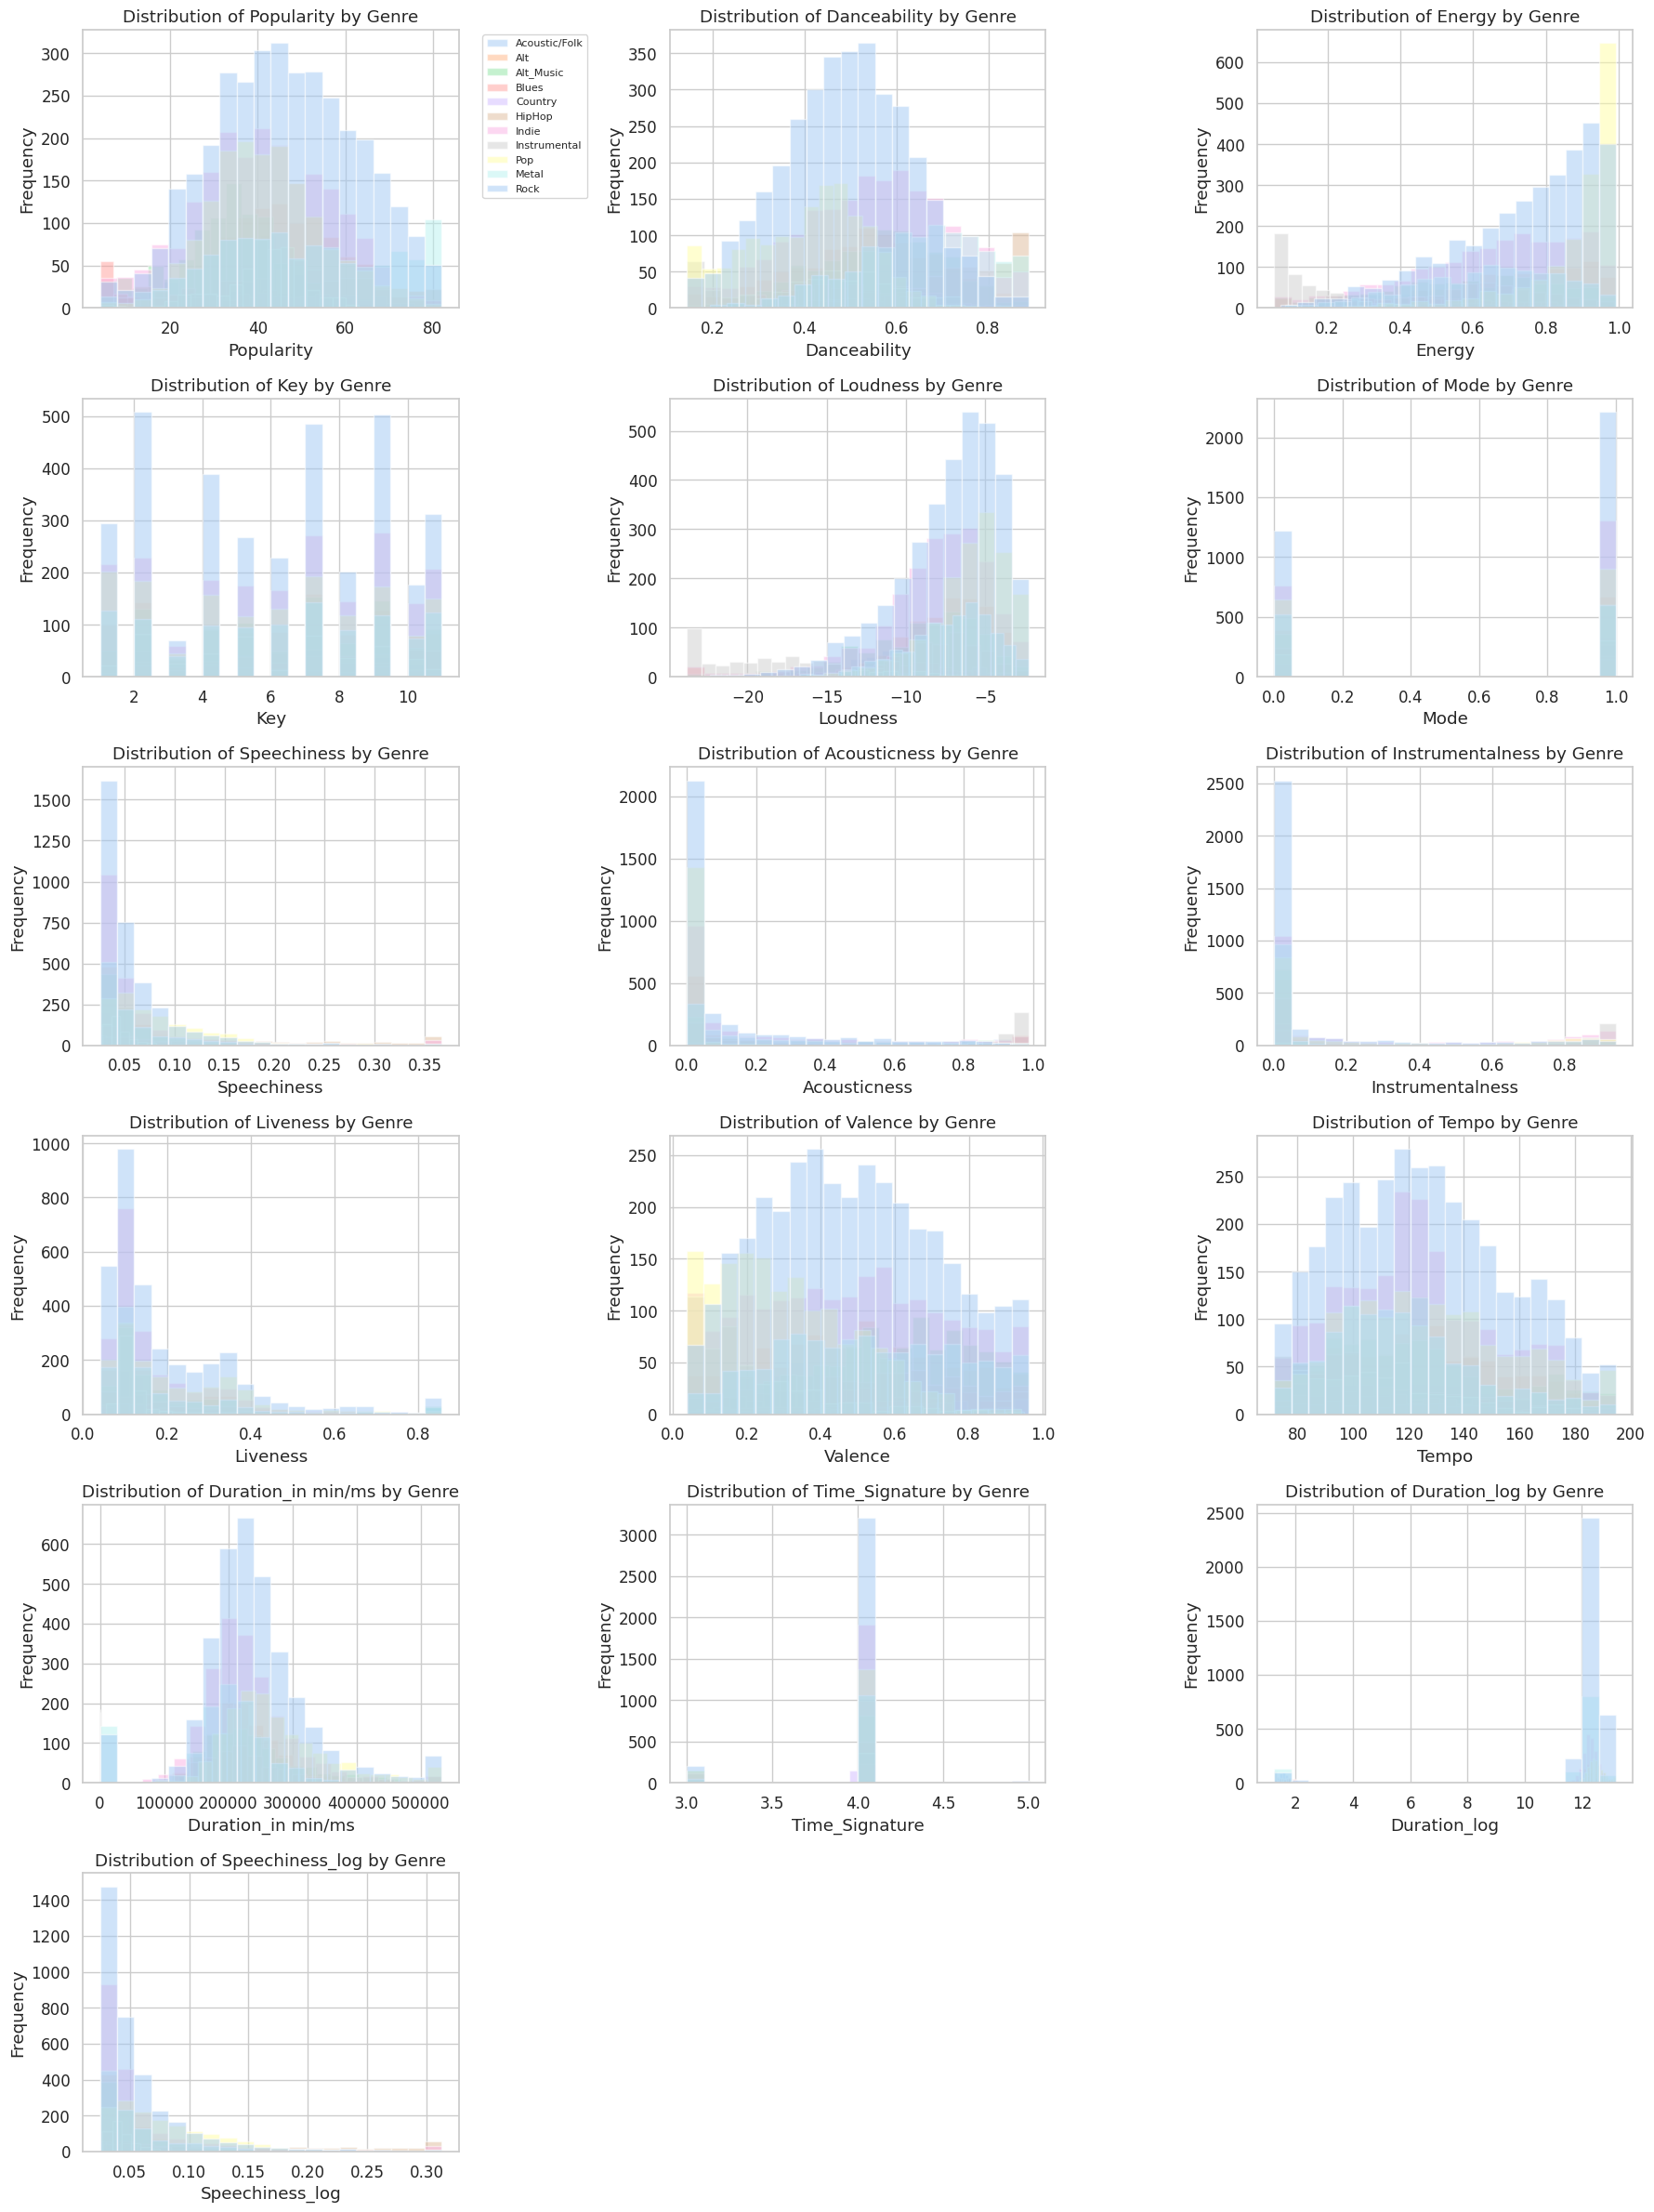

In [83]:
## Distribusi fitur per Class

# Mapping genre
genre_mapping = {
    0: 'Acoustic/Folk',
    1: 'Alt',
    2: 'Alt_Music',
    3: 'Blues',
    4: 'Country',
    5: 'HipHop',
    6: 'Indie',
    7: 'Instrumental',
    8: 'Pop',
    9: 'Metal',
    10: 'Rock'
}

# Data untuk visualisasi
X = train.drop(columns=['Class'], errors='ignore')
y = train['Class']
data_vis = X.copy()
data_vis['Class'] = y

# Pilih semua fitur numerik
numeric_features = data_vis.select_dtypes(include=[np.number]).columns.tolist()
numeric_features.remove('Class')

# Plot semua fitur
n_features = len(numeric_features)
n_cols = 3  # jumlah kolom per baris plot
n_rows = int(np.ceil(n_features / n_cols))

plt.figure(figsize=(n_cols * 6, n_rows * 4))

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(n_rows, n_cols, i)
    for class_label in sorted(data_vis['Class'].unique()):
        subset = data_vis[data_vis['Class'] == class_label]
        plt.hist(subset[feature], bins=20, alpha=0.5, label=genre_mapping[class_label])
    plt.title(f'Distribution of {feature} by Genre')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    if i == 1:  # tampilkan legend hanya di plot pertama biar tidak menumpuk
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

plt.tight_layout()
plt.show()


### Interpretasi

Dari histogram dapat dilihat fitur mana yang memiliki distribusi miring (skewed), misalnya `Duration_in min/ms` atau `Speechiness`, yang sudah di log-transform sebelumnya untuk menormalkan distribusinya.

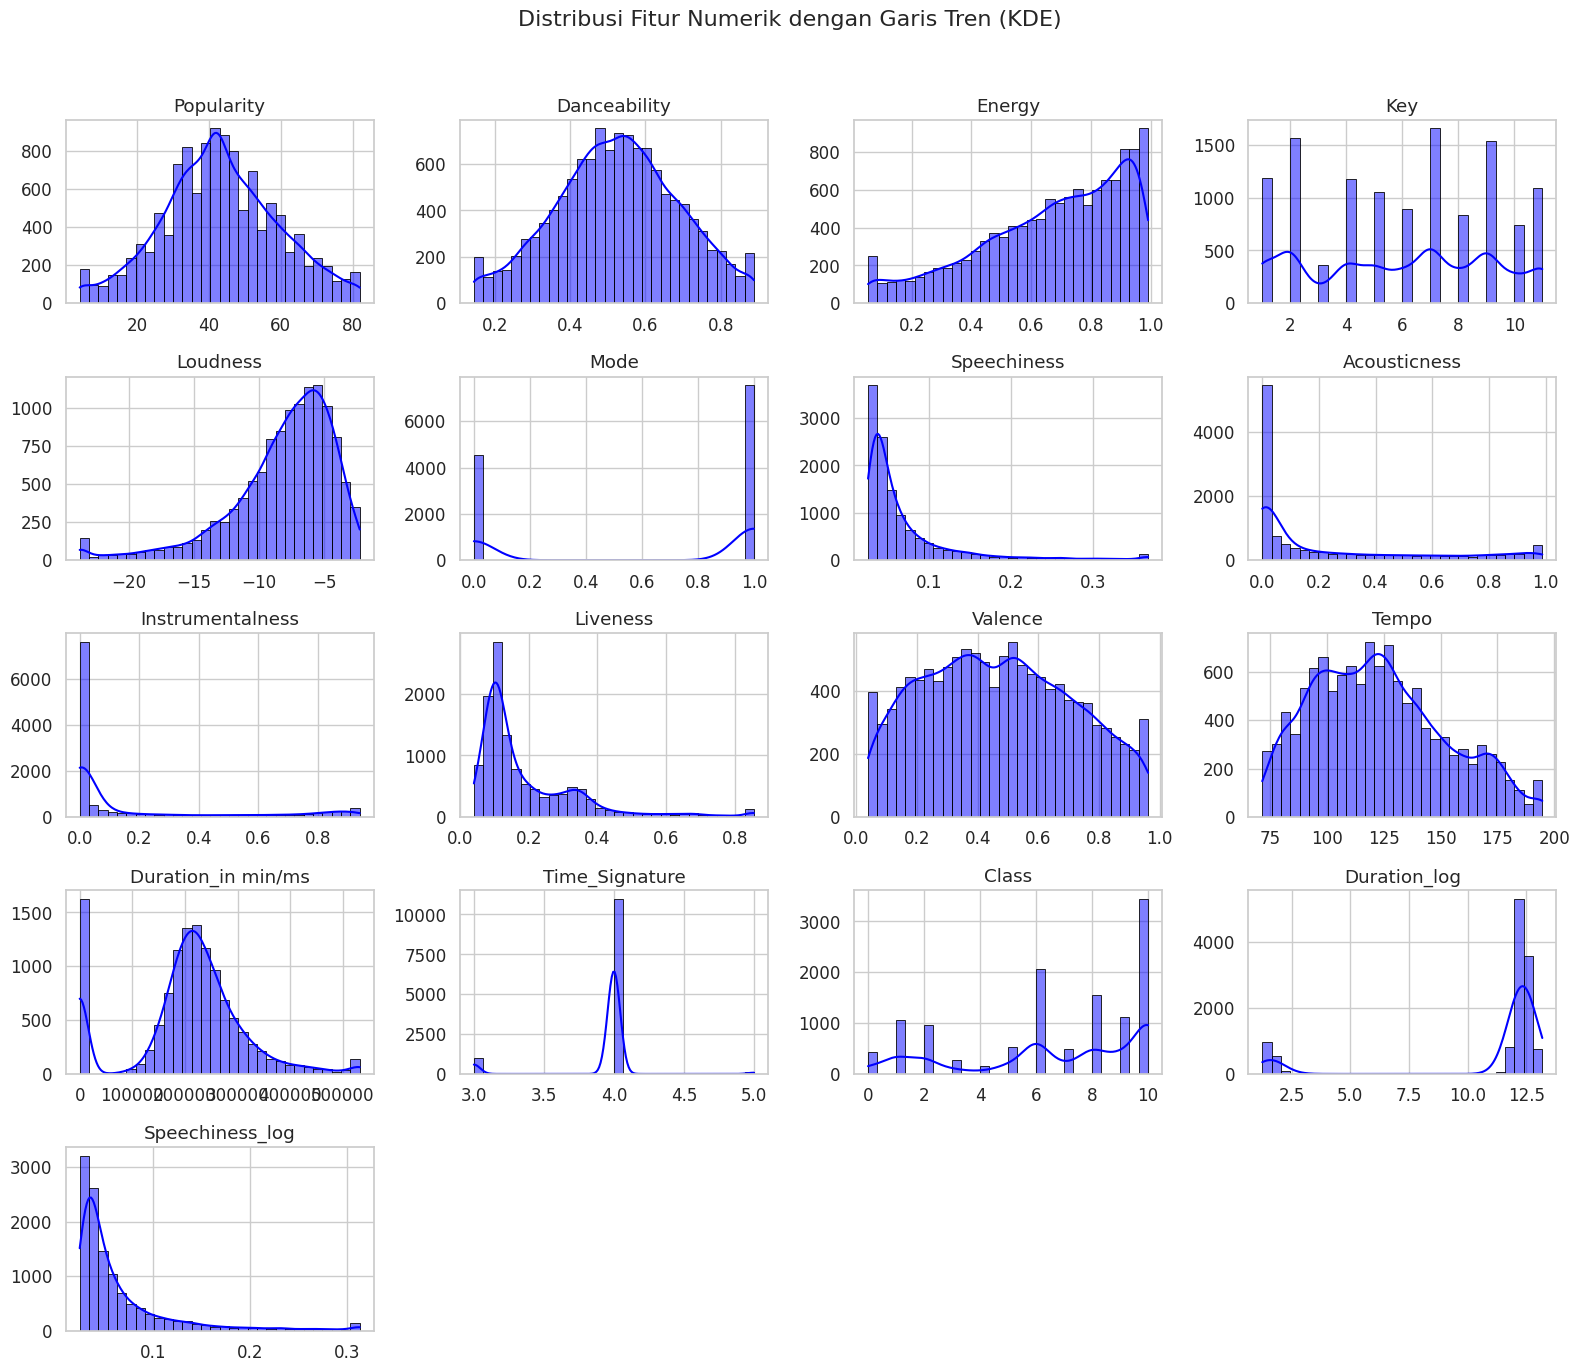

In [84]:
## Distribusi Fitur Numerik

num_cols = train.select_dtypes(include=np.number).columns.tolist()
n_cols = 4
n_rows = int(np.ceil(len(num_cols) / n_cols))

plt.figure(figsize=(16, 14))
for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(train[col], bins=30, kde=True, color='blue', edgecolor='black')
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('')

plt.suptitle('Distribusi Fitur Numerik dengan Garis Tren (KDE)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Interpretasi

Fitur (`Energy` dan `Loudness`), (`SPeechiness` dan `Speechiness_log`), serta (`Duration_in min/ms` dan `Duration_log`) memiliki korelasi tinggi, menunjukkan kemungkinan redundansi. Hal ini perlu diperhatikan saat feature selection agar model tidak menggunakan informasi yang berlebihan dari fitur yang mirip.

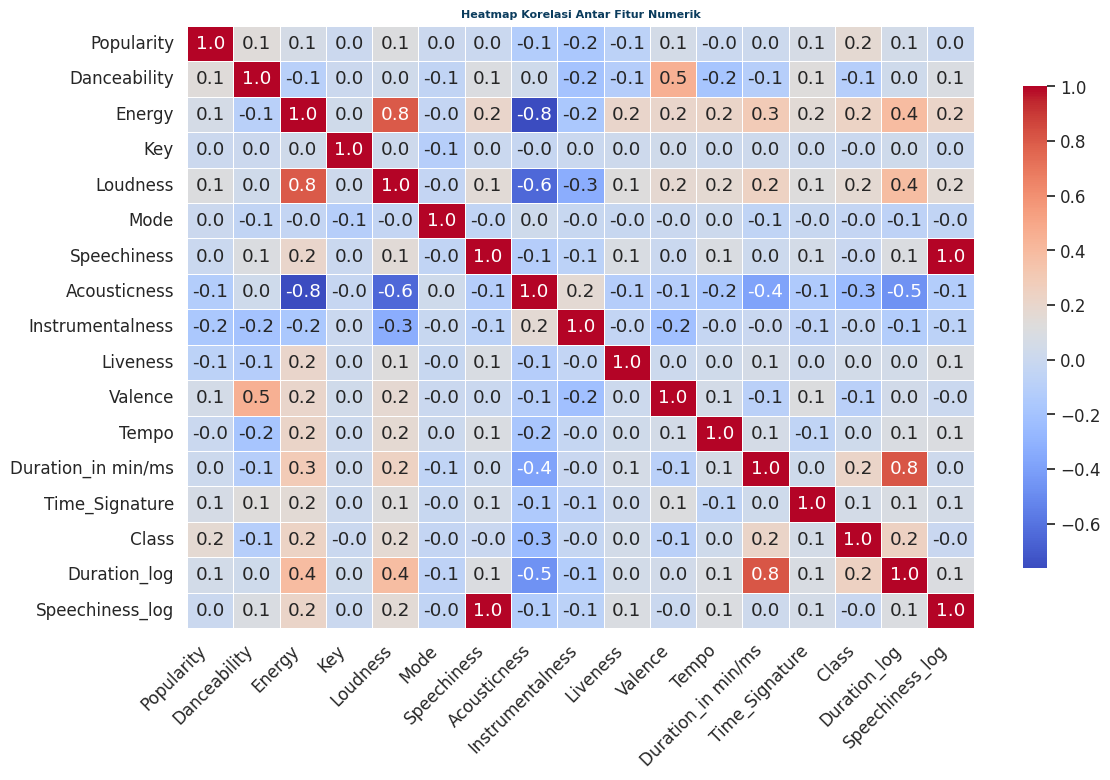

In [85]:
## Korelasi Antar Fitur Numerik

plt.figure(figsize=(12,8))
corr_matrix = train[num_cols].corr()

sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    annot=True,
    fmt=".1f",
    linewidths=0.5,
    cbar_kws={'shrink': 0.8}
)

plt.title('Heatmap Korelasi Antar Fitur Numerik', fontsize=8, fontweight='bold', color='#0B3C5D')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## **Feature Selection**

> **Hapus kolom lama / redundan**
* Hapus kolom asli yang sudah diganti versi log yang sudah ditransformasi(`Duration_in min/ms`, `Speechiness`)
* Meskipun (`Loudness`) berkorelasi tinggi dengan `Energy`, akan tetapi keduanya merepresentasikan aspek berbeda. `Loudness` mengukur intensitas suara, sedangkan `Energy` menggambarkan dinamika dan kekuatan lagu secara keseluruhan. Sehingga keduanya dipertahankan.

In [86]:
## Feature Selection

# Hapus kolom lama dan redundan
cols_to_drop = ['Duration_in min/ms', 'Speechiness']
train = train.drop(columns=cols_to_drop, errors='ignore')
print("Kolom lama dan redundan telah dihapus:", cols_to_drop)


Kolom lama dan redundan telah dihapus: ['Duration_in min/ms', 'Speechiness']


In [87]:
## Rename kolom log menjadi nama asli

train = train.rename(columns={'Duration_log': 'Duration_in min/ms',
                              'Speechiness_log': 'Speechiness'})
print("Kolom log telah diganti namanya menjadi nama asli")


Kolom log telah diganti namanya menjadi nama asli


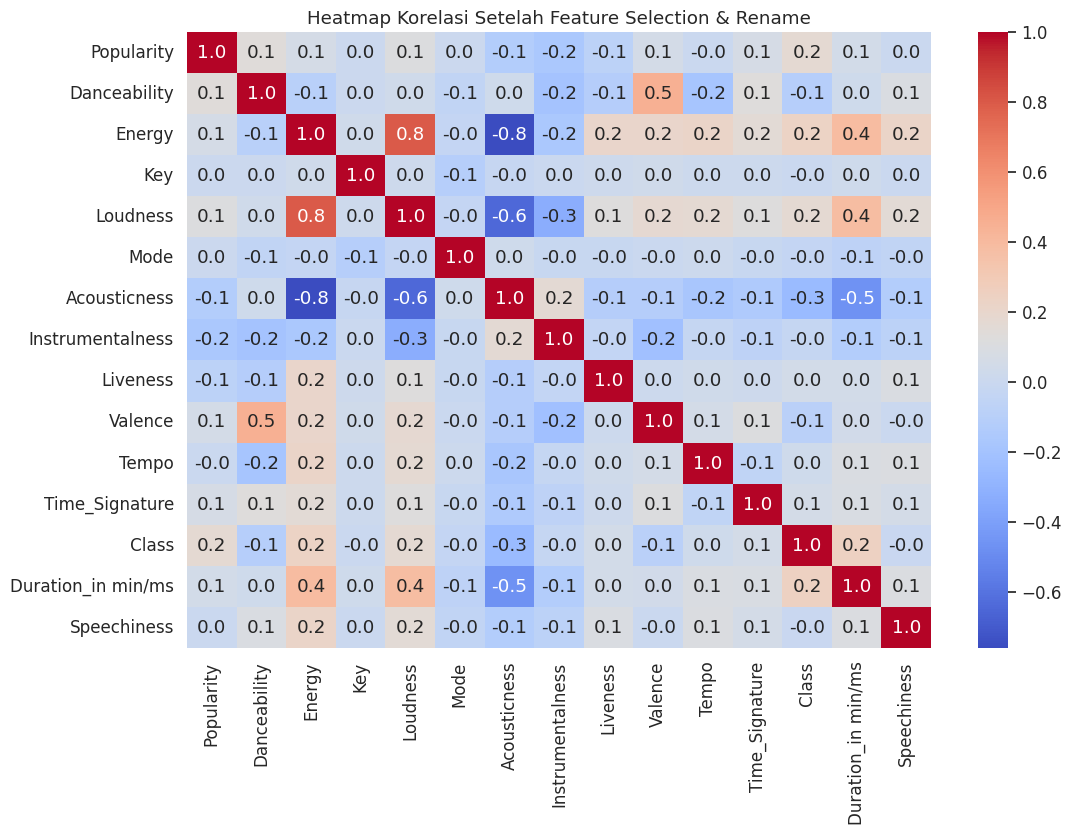

In [88]:
## Cek heatmap korelasi terbaru

numeric_cols = train.select_dtypes(include='number')
plt.figure(figsize=(12,8))
sns.heatmap(numeric_cols.corr(), cmap='coolwarm', annot=True, fmt='.1f')
plt.title('Heatmap Korelasi Setelah Feature Selection & Rename')
plt.show()


## **Split Data menjadi Train, Validation, dan Test**

In [89]:
## Split Data menjadi Train, Validation, dan Test

# Target = 'Class' dan semua fitur lain sudah siap
X = train.drop(columns='Class')
y = train['Class']

# Pisahkan 80% train, 20% sementara
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Pisahkan sisa 20% menjadi 10% val dan 10% test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print(f"Train: {len(X_train)} ({len(X_train)/len(X)*100:.2f}%)")
print(f"Validation: {len(X_val)} ({len(X_val)/len(X)*100:.2f}%)")
print(f"Test: {len(X_test)} ({len(X_test)/len(X)*100:.2f}%)")


Train: 9670 (80.00%)
Validation: 1209 (10.00%)
Test: 1209 (10.00%)


## **Standardisasi Fitur Numerik**

Pada tahap ini, semua fitur numerik pada dataset diubah skalanya agar:
* Rata-rata (mean) = 0  
* Standar deviasi (std) = 1  

> **Tujuan standarisasi**:  
1. Membuat fitur dengan skala berbeda menjadi sebanding, sehingga fitur besar tidak mendominasi.  
2. Membantu algoritma distance-based (misal KNN, SVM) dan gradient-based (misal regresi linear, neural network) lebih stabil dan cepat konvergen.  
3. Mencegah bias saat training model, terutama ketika fitur memiliki range yang berbeda signifikan.

> **Langkah yang dilakukan**:
1. Memilih kolom numerik dari `X_train`.  
2. Fit `StandardScaler` hanya di train set.  
3. Transform `X_train` dan `X_val` menggunakan scaler yang sama.  
4. Hasilnya disimpan dalam DataFrame baru dengan nama kolom tetap sama, siap digunakan untuk pemodelan.

In [90]:
## Standardisasi Nilai Numerik

# Pilih kolom numerik saja
num_cols = X_train.select_dtypes(include='number').columns.tolist()

# Buat scaler
scaler = StandardScaler()

# Fit scaler di data training
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train[num_cols]),
    columns=num_cols,
    index=X_train.index
)

# Transform validation & test
X_val_scaled = pd.DataFrame(
    scaler.transform(X_val[num_cols]),
    columns=num_cols,
    index=X_val.index
)

X_test_scaled = pd.DataFrame(
    scaler.transform(X_test[num_cols]),
    columns=num_cols,
    index=X_test.index
)

print("Standarisasi fitur numerik selesai.")


Standarisasi fitur numerik selesai.


## **Pemodelan**

Decision Tree Accuracy: 0.3656
              precision    recall  f1-score   support

           0       0.60      0.58      0.59        43
           1       0.08      0.13      0.10       106
           2       0.34      0.36      0.35        96
           3       0.77      0.59      0.67        29
           4       0.29      0.31      0.30        16
           5       0.36      0.38      0.37        52
           6       0.25      0.25      0.25       207
           7       0.82      0.94      0.88        49
           8       0.54      0.55      0.54       155
           9       0.29      0.27      0.28       112
          10       0.40      0.33      0.36       344

    accuracy                           0.37      1209
   macro avg       0.43      0.43      0.43      1209
weighted avg       0.38      0.37      0.37      1209

------------------------------------------------------------
Random Forest Accuracy: 0.4880
              precision    recall  f1-score   support

         

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

AdaBoost Accuracy: 0.2771
              precision    recall  f1-score   support

           0       0.15      0.09      0.12        43
           1       0.00      0.00      0.00       106
           2       0.00      0.00      0.00        96
           3       0.00      0.00      0.00        29
           4       0.00      0.00      0.00        16
           5       0.53      0.38      0.44        52
           6       0.25      0.13      0.17       207
           7       0.00      0.00      0.00        49
           8       0.47      0.70      0.56       155
           9       0.12      0.60      0.20       112
          10       0.42      0.32      0.36       344

    accuracy                           0.28      1209
   macro avg       0.18      0.20      0.17      1209
weighted avg       0.26      0.28      0.25      1209

------------------------------------------------------------
Gradient Boosting Accuracy: 0.5318
              precision    recall  f1-score   support

          

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:46:47] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.4930
              precision    recall  f1-score   support

           0       0.69      0.77      0.73        43
           1       0.09      0.06      0.07       106
           2       0.51      0.49      0.50        96
           3       0.83      0.66      0.73        29
           4       0.53      0.50      0.52        16
           5       0.67      0.56      0.61        52
           6       0.36      0.35      0.35       207
           7       0.89      0.96      0.92        49
           8       0.68      0.55      0.61       155
           9       0.45      0.38      0.41       112
          10       0.46      0.60      0.52       344

    accuracy                           0.49      1209
   macro avg       0.56      0.53      0.54      1209
weighted avg       0.49      0.49      0.48      1209

------------------------------------------------------------


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

Logistic Regression Accuracy: 0.4963
              precision    recall  f1-score   support

           0       0.69      0.77      0.73        43
           1       0.00      0.00      0.00       106
           2       0.41      0.40      0.40        96
           3       0.82      0.62      0.71        29
           4       0.53      0.56      0.55        16
           5       0.59      0.46      0.52        52
           6       0.42      0.31      0.36       207
           7       0.87      0.96      0.91        49
           8       0.63      0.57      0.60       155
           9       0.41      0.34      0.37       112
          10       0.44      0.70      0.54       344

    accuracy                           0.50      1209
   macro avg       0.53      0.52      0.52      1209
weighted avg       0.46      0.50      0.47      1209

------------------------------------------------------------


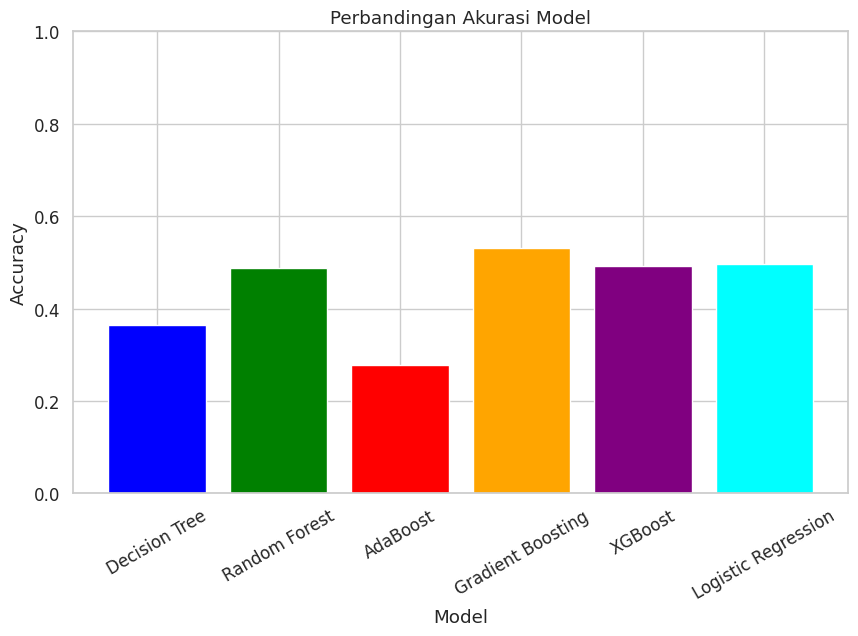

In [91]:
## Pemodelan

# Loop Beberapa Model + Evaluasi

# Daftar model
models = [
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(n_estimators=50, random_state=42)),
    ("AdaBoost", AdaBoostClassifier(n_estimators=50, random_state=42)),
    ("Gradient Boosting", GradientBoostingClassifier(n_estimators=50, random_state=42)),
    ("XGBoost", XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)),
    ("Logistic Regression", LogisticRegression(max_iter=1000, random_state=42))
]

# Simpan hasil evaluasi
results = []

# Loop train dan evaluasi
for name, model in models:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_val_scaled)
    acc = accuracy_score(y_val, y_pred)
    results.append({"Model": name, "Accuracy": acc, "Classification_Report": classification_report(y_val, y_pred)})
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_val, y_pred))
    print("-"*60)

# Visualisasi Perbandingan Akurasi

results_df = pd.DataFrame(results)

plt.figure(figsize=(10, 6))
plt.bar(results_df["Model"], results_df["Accuracy"], color=['blue','green','red','orange','purple','cyan'])
plt.title('Perbandingan Akurasi Model')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.xticks(rotation=30)
plt.show()


Urutan Model Terbaik Berdasarkan Akurasi:

1. Gradient Boosting - Akurasi: 0.5318
2. Logistic Regression - Akurasi: 0.4963
3. XGBoost - Akurasi: 0.4930
4. Random Forest - Akurasi: 0.4880
5. Decision Tree - Akurasi: 0.3656
6. AdaBoost - Akurasi: 0.2771


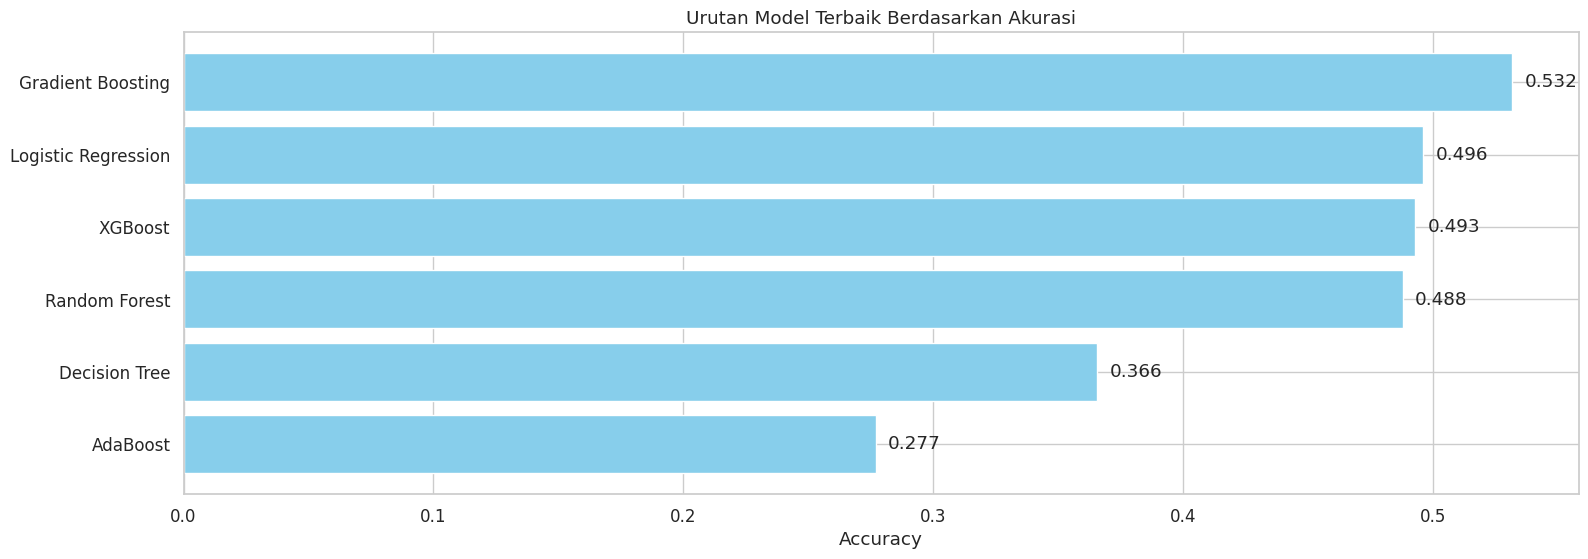

In [92]:
## Urutan Hasil Model berdasarkan Tingkat Akurasi

results_df_sorted = results_df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

print("Urutan Model Terbaik Berdasarkan Akurasi:\n")
for i, row in results_df_sorted.iterrows():
    print(f"{i+1}. {row['Model']} - Akurasi: {row['Accuracy']:.4f}")

# Visualisasi bar chart dengan urutan akurasi
plt.figure(figsize=(18, 6))
plt.barh(results_df_sorted["Model"], results_df_sorted["Accuracy"], color="skyblue")
plt.xlabel("Accuracy")
plt.title("Urutan Model Terbaik Berdasarkan Akurasi")
plt.gca().invert_yaxis()  # supaya model terbaik ada di atas
for i, v in enumerate(results_df_sorted["Accuracy"]):
    plt.text(v + 0.005, i, f"{v:.3f}", va='center')
plt.show()

Accuracy (Decision Tree visualisasi): 0.46980976013234077

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.77      0.69        43
           1       0.00      0.00      0.00       106
           2       0.00      0.00      0.00        96
           3       0.73      0.55      0.63        29
           4       0.32      0.44      0.37        16
           5       0.56      0.37      0.44        52
           6       0.44      0.36      0.40       207
           7       0.91      0.88      0.90        49
           8       0.71      0.42      0.53       155
           9       0.42      0.46      0.44       112
          10       0.40      0.75      0.52       344

    accuracy                           0.47      1209
   macro avg       0.47      0.45      0.45      1209
weighted avg       0.42      0.47      0.42      1209



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


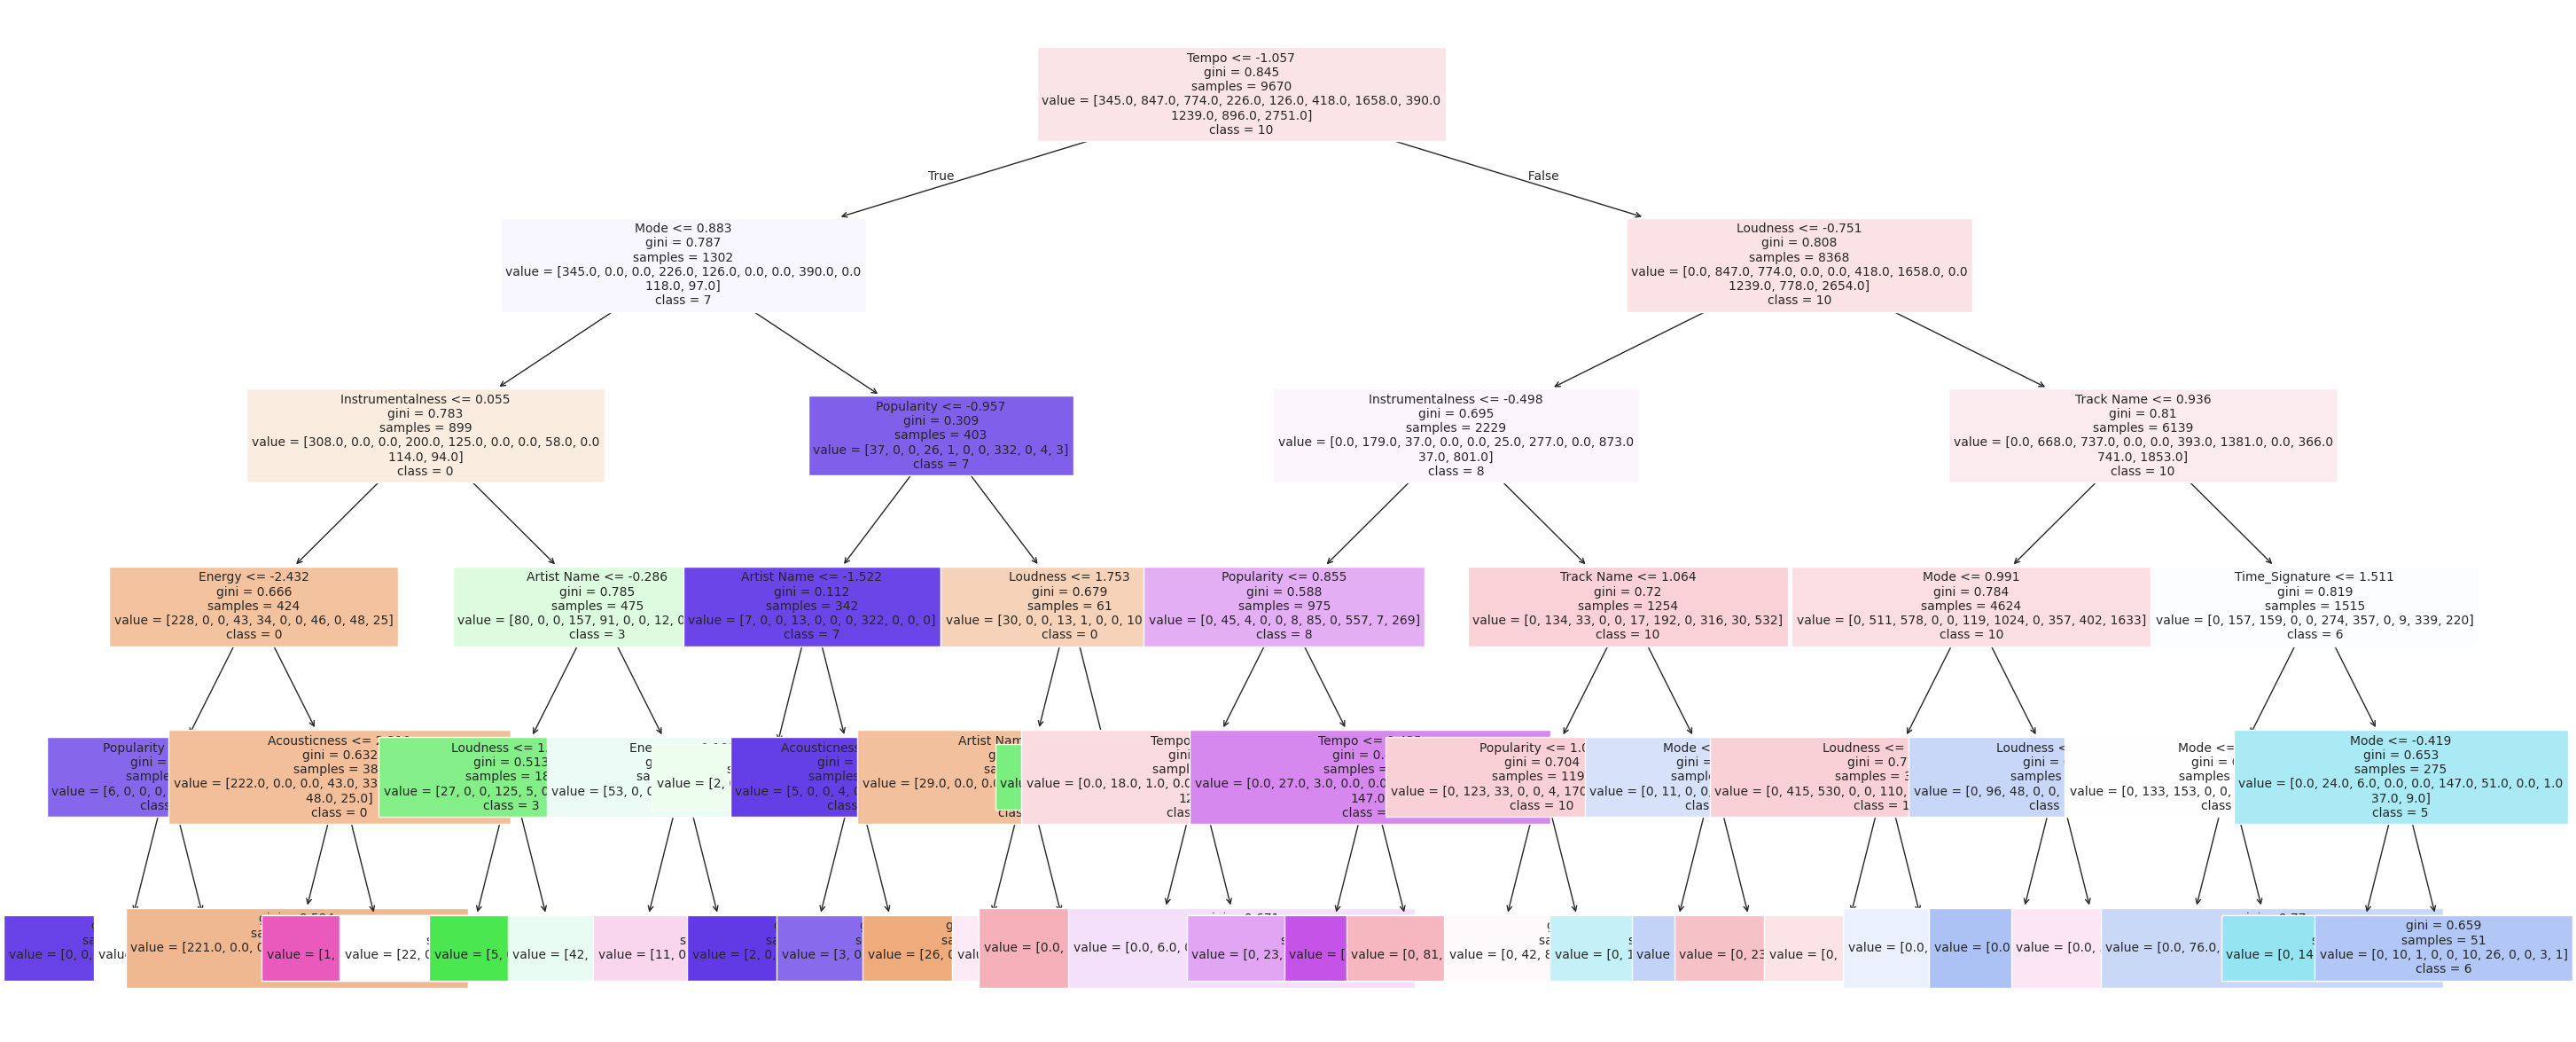

In [93]:
## Visualisasi Decision Tree

# Model khusus untuk visualisasi (batasi depth supaya pohon tidak terlalu besar)
dt_viz = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=42)
dt_viz.fit(X_train_scaled, y_train)

# Prediksi dan evaluasi
y_pred_viz = dt_viz.predict(X_val_scaled)
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy (Decision Tree visualisasi):", accuracy_score(y_val, y_pred_viz))
print("\nClassification Report:\n", classification_report(y_val, y_pred_viz))

# Visualisasi pohon
plt.figure(figsize=(35,15))
plot_tree(dt_viz,
          feature_names=X_train.columns,
          class_names=[str(c) for c in dt_viz.classes_],
          filled=True,
          fontsize=10)
plt.show()


In [94]:
## Akurasi tiap Model

results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Classification_Report
0,Decision Tree,0.365591,precision recall f1-score ...
1,Random Forest,0.488007,precision recall f1-score ...
2,AdaBoost,0.277089,precision recall f1-score ...
3,Gradient Boosting,0.531844,precision recall f1-score ...
4,XGBoost,0.492969,precision recall f1-score ...
5,Logistic Regression,0.496278,precision recall f1-score ...


In [95]:
## Model Terbaik

best_model_row = results_df.loc[results_df['Accuracy'].idxmax()]
print("Model Terbaik:")
print(best_model_row)

# Ambil nama model terbaik
best_model_name = results_df.loc[results_df['Accuracy'].idxmax(), 'Model']
print("\nModel terbaik:", best_model_name)

# Definisikan semua model lagi
models_dict = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}

# Pilih model terbaik
best_model = models_dict[best_model_name]

# Latih ulang dengan semua data train
best_model.fit(X_train_scaled, y_train)

Model Terbaik:
Model                                                    Gradient Boosting
Accuracy                                                          0.531844
Classification_Report                  precision    recall  f1-score   ...
Name: 3, dtype: object

Model terbaik: Gradient Boosting


GradientBoostingClassifier(random_state=42)

In [96]:
## Validation Accuracy dan Test Accuracy

# Ambil model terbaik dari hasil evaluasi di validation
best_model_name = results_df.loc[results_df['Accuracy'].idxmax(), 'Model']
print("Model terbaik berdasarkan validasi:", best_model_name)

# Definisikan semua kandidat model
models_dict = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}

# Pilih model terbaik
best_model = models_dict[best_model_name]

# Latih hanya di training
best_model.fit(X_train_scaled, y_train)

# Evaluasi di validation (opsional, untuk double-check)
y_val_pred = best_model.predict(X_val_scaled)
print("\nValidation Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

# Latih final model di training + validation sebelum test
X_train_val_scaled = pd.concat([X_train_scaled, X_val_scaled])
y_train_val = pd.concat([y_train, y_val])

best_model.fit(X_train_val_scaled, y_train_val)

# Evaluasi final di test set
y_test_pred = best_model.predict(X_test_scaled)
print("\nTest Accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))


Model terbaik berdasarkan validasi: Gradient Boosting

Validation Accuracy: 0.5500413564929694
              precision    recall  f1-score   support

           0       0.67      0.79      0.72        43
           1       0.22      0.02      0.03       106
           2       0.59      0.52      0.55        96
           3       0.87      0.69      0.77        29
           4       0.50      0.56      0.53        16
           5       0.67      0.62      0.64        52
           6       0.45      0.43      0.44       207
           7       0.92      0.94      0.93        49
           8       0.73      0.59      0.65       155
           9       0.52      0.39      0.45       112
          10       0.48      0.72      0.58       344

    accuracy                           0.55      1209
   macro avg       0.60      0.57      0.57      1209
weighted avg       0.54      0.55      0.53      1209


Test Accuracy: 0.5128205128205128
              precision    recall  f1-score   support

  

## **Evaluasi Model**

Accuracy (Test): 0.5128205128205128

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.76      0.79      0.77        43
           1       0.20      0.01      0.02       106
           2       0.47      0.46      0.47        97
           3       0.61      0.68      0.64        28
           4       0.69      0.56      0.62        16
           5       0.58      0.50      0.54        52
           6       0.39      0.38      0.39       207
           7       0.92      0.94      0.93        49
           8       0.60      0.56      0.58       155
           9       0.53      0.43      0.47       112
          10       0.46      0.66      0.54       344

    accuracy                           0.51      1209
   macro avg       0.57      0.54      0.54      1209
weighted avg       0.49      0.51      0.49      1209



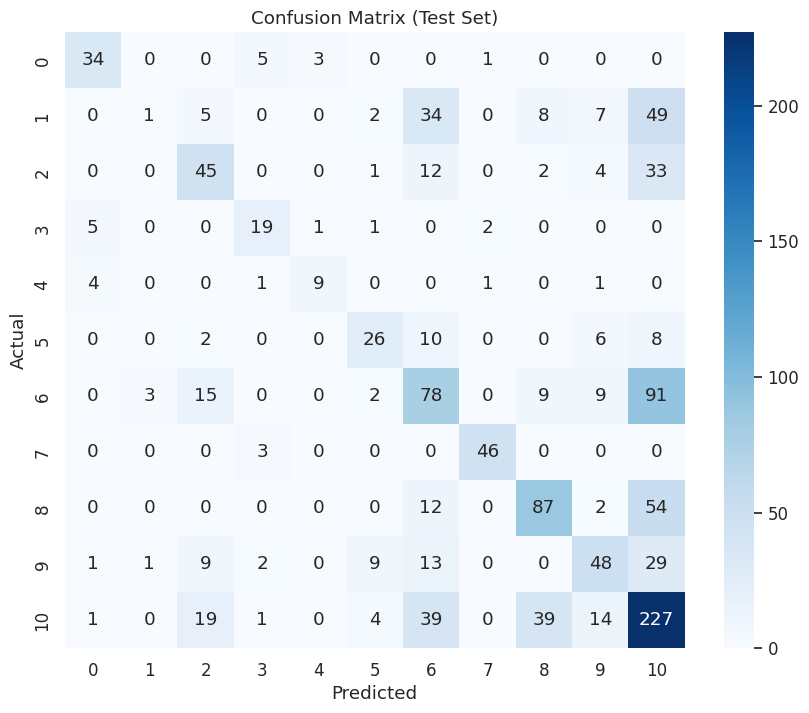


Feature Importance (Test Evaluation)
Top 10 Most Important Features:
               feature  importance
12  Duration_in min/ms    0.215591
6         Acousticness    0.179969
2               Energy    0.107835
7     Instrumentalness    0.090976
1         Danceability    0.086809
0           Popularity    0.079632
9              Valence    0.076824
13         Speechiness    0.069131
4             Loudness    0.034574
10               Tempo    0.026026


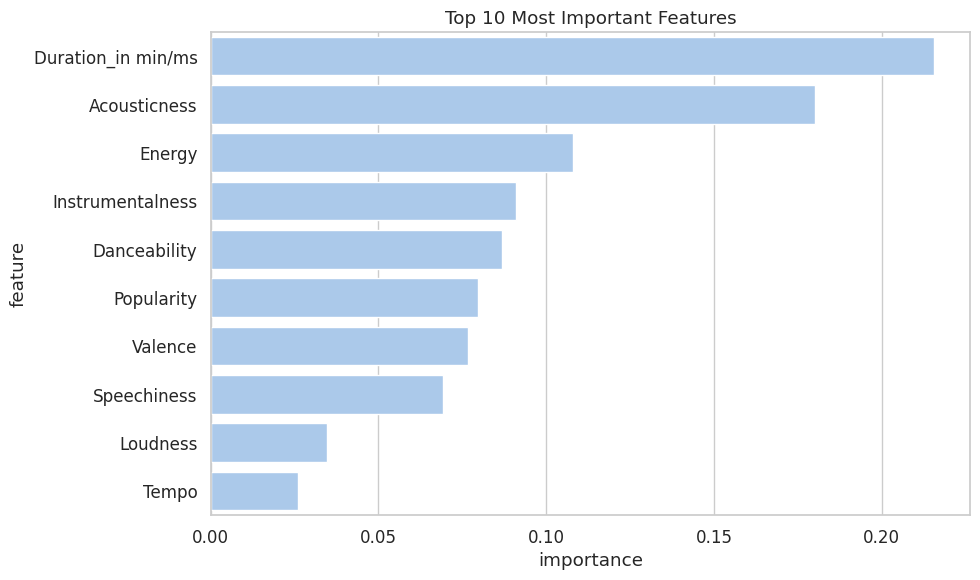

In [66]:
## Evaluasi Model

# Prediksi di test set
y_test_pred = best_model.predict(X_test_scaled)

# Accuracy
print("Accuracy (Test):", accuracy_score(y_test, y_test_pred))

# Classification report
print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Test Set)")
plt.show()

# Feature Importance (gunakan model terbaik, misal Gradient Boosting/XGBoost)
print("\nFeature Importance (Test Evaluation)")

feature_importance = pd.DataFrame({
    'feature': X_train_scaled.columns,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 10 Most Important Features:")
print(feature_importance.head(10))

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Most Important Features')
plt.tight_layout()
plt.show()


## **Implementasi Use Case Bisnis dan Evaluasi Model**

Model **Gradient Boosting Classifier** dipilih sebagai model terbaik karena memberikan performa paling tinggi dibandingkan model lain seperti Decision Tree, Random Forest, AdaBoost, XGBoost, dan Logistic Regression. Selain itu, model ini secara karakteristik sangat sesuai dengan pola data yang digunakan.

Dataset yang digunakan memiliki fitur numerik kontinu seperti `Energy`, `Acousticness`, `Duration`, `Danceability`, dan `Valence` yang saling berhubungan secara kompleks dan tidak selalu linear.
Dalam kondisi seperti ini, Gradient Boosting lebih unggul karena:
1. Dapat menangkap hubungan non-linear antar variabel secara efektif.
2. Menggabungkan banyak pohon keputusan (weak learners) secara bertahap, sehingga mampu memperbaiki kesalahan dari model sebelumnya dan menghasilkan prediksi yang lebih akurat.
3. Lebih tahan terhadap outlier dan noise dibanding model linier seperti Logistic Regression.
4. Cocok untuk dataset berukuran menengah dengan jumlah fitur yang tidak terlalu besar, seperti dataset ini.

Hasil evaluasi pada test set menunjukkan:
* Akurasi keseluruhan: 51,28%
* Rata-rata (macro average):
  * Precision: 0.57
  * Recall: 0.54
  * F1-score: 0.54

Confusion matrix memperlihatkan bahwa model mampu mengenali beberapa kelas dengan cukup baik, terutama pada kelas 0, 7, dan 10, namun masih terjadi kesalahan prediksi pada kelas lain dengan jumlah data lebih kecil atau karakteristik fitur yang mirip.

Dari hasil feature importance, variabel yang paling berpengaruh terhadap hasil prediksi adalah:
1. `Duration_in_min/ms`
2. `Acousticness`
3. `Energy`
4. `Instrumentalness`
5. `Danceability`

Hal ini menunjukkan bahwa durasi, tingkat keakustikan, dan energi lagu menjadi faktor pembeda paling dominan antar kategori.

## **Insight dan Rekomendasi Aksi**

> **Insight**

* Model Gradient Boosting Classifier menghasilkan akurasi 51% pada data uji.
*  Model sudah cukup mampu membedakan genre dengan karakteristik audio yang khas.
*  Fitur paling berpengaruh terhadap prediksi genre adalah:
    1. `Duration_in_min/ms`
    2. `Acousticness`
    3. `Energy`
    4. `Instrumentalness`
    5. `Danceability`

* Genre dengan ciri sonik kuat dan konsisten (misalnya Rock dan Instrumental) cenderung lebih mudah diklasifikasikan.
* Genre dengan karakteristik campuran (Pop, HipHop) lebih sulit diprediksi secara tepat, menunjukkan bahwa batas antar-genre bisa tumpang tindih.
* Performa model dapat meningkat dengan penambahan fitur kontekstual seperti lyrics sentiment, release year, atau artist popularity.

> **Rekomendasi Aksi**

1. Automatisasi Klasifikasi Lagu Baru
    * Gunakan model untuk mengelompokkan lagu baru ke genre yang tepat berdasarkan fitur audio.
    * Menghemat waktu dan biaya tim kurasi musik yang biasanya melakukan pengelompokan manual.

2. Optimasi Sistem Rekomendasi Lagu
    * Integrasikan hasil klasifikasi dengan sistem rekomendasi agar pengguna mendapat playlist yang sesuai dengan preferensi genre-nya.
    * Misalnya, pengguna yang sering mendengarkan lagu dengan high energy bisa direkomendasikan Rock atau Metal.

3. Analisis Tren dan Strategi Promosi
    * Gunakan hasil prediksi genre untuk memantau tren musik dan preferensi pengguna.
    * Data ini dapat digunakan untuk:
      * Menentukan genre yang sedang populer.
      * Menyusun kampanye promosi artis yang lebih relevan.
      * Mengarahkan kolaborasi bisnis antar artis atau label.

4. Peningkatan dan Enrichment Data
    * Kumpulkan lebih banyak data dari genre minor agar model lebih seimbang.
    * Tambahkan fitur non-audio (popularitas, tahun rilis, label musik) untuk memberikan konteks tambahan dalam prediksi genre.
    * Pertimbangkan penggunaan model berbasis deep learning (misalnya CNN untuk spectrogram audio) untuk performa lebih tinggi.

5. Integrasi dengan Data Perilaku Pengguna
    * Kombinasikan hasil klasifikasi dengan data seperti skip rate, duration listened, atau favorite artist.
    * Hasilnya dapat digunakan untuk meningkatkan personalisasi pengalaman pengguna dan meningkatkan user retention.

Model prediksi genre musik berbasis fitur audio ini memiliki potensi besar untuk membantu platform musik digital dalam meningkatkan efisiensi pengelolaan konten, memperkuat sistem rekomendasi,dan mendukung strategi bisnis berbasis data di industri musik modern.